In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Book2.csv")
df.head()
df.shape

(181691, 135)

In [3]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.003238e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.383523e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.990000e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.010000e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.010000e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273500e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.020000e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
df.dtypes

eventid       float64
iyear           int64
imonth          int64
iday            int64
approxdate     object
               ...   
INT_LOG         int64
INT_IDEO        int64
INT_MISC        int64
INT_ANY         int64
related        object
Length: 135, dtype: object

In [5]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [6]:
df.nunique()

eventid           6
iyear            47
imonth           13
iday             32
approxdate     2244
              ...  
INT_LOG           3
INT_IDEO          3
INT_MISC          3
INT_ANY           3
related       14306
Length: 135, dtype: int64

In [7]:
#dropping duplicate value
df.drop_duplicates(inplace=True)
df.shape

(177140, 135)

In [8]:
df.duplicated().any()

False

In [9]:
#picking out impoertant coloumns
df = df[['iyear','imonth','iday','country_txt','provstate','region_txt',
                       'attacktype1_txt','target1','nkill','nwound','summary','gname', 
                       'targtype1_txt','weaptype1_txt','motive']]

In [10]:
#Renaming of the columns
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'State',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [11]:
df.head()

,Year,Month,Day,Country,State,Region,AttackType,Target,Killed,Wounded,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Assassination,Julio Guzman,1.0,0.0,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Hostage Taking (Kidnapping),"Nadine Chaval, daughter",0.0,0.0,NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Assassination,Employee,1.0,0.0,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Bombing/Explosion,U.S. Embassy,NaN,NaN,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Facility/Infrastructure Attack,U.S. Consulate,NaN,NaN,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [12]:
#check for no. of null values
df.nunique()

Year               47
Month              13
Day                32
Country           205
State            2854
Region             12
AttackType          9
Target          86006
Killed            205
Wounded           237
Summary        112492
Group            3537
Target_type        22
Weapon_type        12
Motive          14490
dtype: int64

In [13]:
#null values
df.isna().sum().sort_values()


Year                0
Month               0
Day                 0
Country             0
Region              0
AttackType          0
Group               0
Target_type         0
Weapon_type         0
State             421
Target            589
Killed           9667
Wounded         15552
Summary         63591
Motive         126968
dtype: int64

In [14]:
df['State'].value_counts()

Baghdad                  7639
Northern Ireland         4422
Unknown                  4101
Balochistan              3682
Saladin                  3167
                         ... 
Topaz (Province)            1
Obilic (Municipality)       1
East Timor (Region)         1
Berber (Province)           1
Vidzeme                     1
Name: State, Length: 2854, dtype: int64

In [15]:
# Treating Null Values in State Column
df['State'] = df['State'].replace({'Unknown': np.nan})
df['State'] = df['State'].fillna("Others")

In [16]:
#checking for null values in State coloumn
df['State'].isna().any()

False

In [17]:
#Treating Target in same way
df['Target'].value_counts()

Civilians                                        6383
Unknown                                          5549
Soldiers                                         3101
Patrol                                           2934
Checkpoint                                       2799
                                                 ... 
passengers on Train, Batticaloa-Colombo train       1
Officer (corporal) *                                1
Hindu Funeral Procession                            1
Kbal Krapeu Village                                 1
Hmeymim Air Base                                    1
Name: Target, Length: 86006, dtype: int64

In [18]:
# Treating Null Values in State Column
df['Target'] = df['Target'].replace({'Unknown': np.nan})
df['Target'] = df['Target'].fillna("Others")

In [19]:
#checking for null values in State coloumn
df['Target'].isna().any()

False

In [20]:
df['Killed'].value_counts()

0.0      84766
1.0      36268
2.0      14080
3.0       7705
4.0       4943
         ...  
275.0        1
320.0        1
104.0        1
271.0        1
311.0        1
Name: Killed, Length: 205, dtype: int64

In [21]:
#check for null values
df['Killed'].isnull().any()

True

In [22]:
#putting mean value of killed people in place unknown value
df['Killed'] = df['Killed'].fillna(df['Killed'].mean())

In [23]:
#check for null values
df['Killed'].isnull().any()

False

In [24]:
#Same with wounded peoples
print(df['Wounded'].value_counts())
df['Wounded'] = df['Wounded'].fillna(df['Wounded'].mean())
print(df['Wounded'].isnull().any())

0.0       99842
1.0       15852
2.0       10170
3.0        7268
4.0        4861
          ...  
8190.0        1
137.0         1
184.0         1
180.0         1
316.0         1
Name: Wounded, Length: 237, dtype: int64
False


In [25]:
#Dropping rows with no data of day
df['Day']= df['Day'].replace(0,np.nan)
df = df.dropna(subset=['Day'])

In [26]:
# Dropping Null Values of Summary and Motive Column
df = df.dropna(subset=['Summary'])
df = df.dropna(subset=['Motive'])

In [27]:
df.isna().sum().sort_values()

Year           0
Month          0
Day            0
Country        0
State          0
Region         0
AttackType     0
Target         0
Killed         0
Wounded        0
Summary        0
Group          0
Target_type    0
Weapon_type    0
Motive         0
dtype: int64

In [28]:
#Fresh updated data
df.head()


,Year,Month,Day,Country,State,Region,AttackType,Target,Killed,Wounded,Summary,Group,Target_type,Weapon_type,Motive
5,1970,1,1.0,United States,Illinois,North America,Armed Assault,Cairo Police Headquarters,0.0,0.0,1/1/1970: Unknown African American assailants ...,Black Nationalists,Police,Firearms,To protest the Cairo Illinois Police Deparment
8,1970,1,2.0,United States,Wisconsin,North America,Facility/Infrastructure Attack,"R.O.T.C. offices at University of Wisconsin, M...",0.0,0.0,"1/2/1970: Karl Armstrong, a member of the New ...",New Year's Gang,Military,Incendiary,To protest the War in Vietnam and the draft
9,1970,1,3.0,United States,Wisconsin,North America,Facility/Infrastructure Attack,Selective Service Headquarters in Madison Wisc...,0.0,0.0,"1/3/1970: Karl Armstrong, a member of the New ...",New Year's Gang,Government (General),Incendiary,To protest the War in Vietnam and the draft
11,1970,1,6.0,United States,Colorado,North America,Facility/Infrastructure Attack,"Army Recruiting Station, Denver Colorado",0.0,0.0,1/6/1970: Unknown perpetrators threw a Molotov...,Left-Wing Militants,Military,Incendiary,Protest the draft and Vietnam War
14,1970,1,9.0,United States,Puerto Rico,North America,Facility/Infrastructure Attack,Baker's Store,0.0,0.0,1/9/1970: The Armed Commandos of Liberation c...,Armed Commandos of Liberation,Business,Incendiary,To protest United States owned businesses in P...


In [29]:
df.tail()

,Year,Month,Day,Country,State,Region,AttackType,Target,Killed,Wounded,Summary,Group,Target_type,Weapon_type,Motive
181663,2017,12,30.0,India,Kerala,South Asia,Bombing/Explosion,Koothuparamba Police Station,0.0,0.0,12/30/2017: Assailants threw an explosive devi...,Unknown,Police,Explosives,"The specific motive is unknown; however, sourc..."
181665,2017,12,30.0,India,Chhattisgarh,South Asia,Facility/Infrastructure Attack,Road Construction Site,0.0,0.0,12/30/2017: Assailants set fire to seven vehic...,Communist Party of India - Maoist (CPI-Maoist),Business,Firearms,"The specific motive is unknown; however, sourc..."
181672,2017,12,31.0,India,Jammu and Kashmir,South Asia,Armed Assault,Camp,8.0,3.0,12/31/2017: Assailants armed with grenades and...,Jaish-e-Mohammad (JeM),Police,Explosives,"The specific motive is unknown; however, sourc..."
181682,2017,12,31.0,Italy,Marche,Western Europe,Facility/Infrastructure Attack,Migrant Center,0.0,0.0,12/31/2017: Assailants set fire to a migrants'...,Unknown,Private Citizens & Property,Incendiary,"The specific motive is unknown; however, sourc..."
181683,2017,12,31.0,Afghanistan,Faryab,South Asia,Armed Assault,House of Member,6.0,0.0,12/31/2017: Assailants attacked the house of a...,Taliban,Terrorists/Non-State Militia,Firearms,"The specific motive is unknown; however, sourc..."


In [30]:
df.describe()

,Year,Month,Day,Killed,Wounded
count,49883.000000,49883.000000,49883.000000,49883.000000,49883.000000
mean,2007.883748,6.481126,15.337049,2.809842,4.912500
std,6.481249,3.384259,8.792454,16.273062,57.717450
min,1970.000000,1.000000,1.000000,0.000000,0.000000
25%,2005.000000,4.000000,8.000000,0.000000,0.000000
50%,2009.000000,7.000000,15.000000,1.000000,0.000000
75%,2011.000000,9.000000,23.000000,2.000000,3.233285
max,2017.000000,12.000000,31.000000,1570.000000,8191.000000


In [31]:
df.describe(include='O')

,Country,State,Region,AttackType,Target,Summary,Group,Target_type,Weapon_type,Motive
count,49883,49883,49883,49883,49883,49883,49883,49883,49883,49883
unique,165,1906,12,9,34385,49429,1430,22,12,14387
top,Iraq,Baghdad,South Asia,Bombing/Explosion,Civilians,"08/03/1998: In a series of related incidents, ...",Unknown,Private Citizens & Property,Explosives,Unknown
freq,9335,3761,16710,24512,2465,15,24681,15154,25770,14790


# Country Analysis

In [32]:
country_list = df['Country'].value_counts()
print("COUTRY LIST")
print(country_list)


COUTRY LIST
Iraq             9335
India            5628
Pakistan         5022
Afghanistan      3548
Philippines      2345
                 ... 
St. Lucia           1
Malawi              1
International       1
Turkmenistan        1
Costa Rica          1
Name: Country, Length: 165, dtype: int64


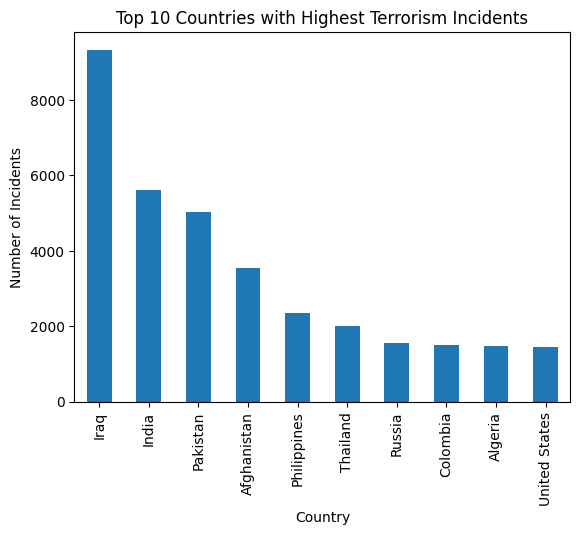

In [33]:
country_list.head(10).plot(kind='bar')
plt.title('Top 10 Countries with Highest Terrorism Incidents')
plt.xlabel('Country')
plt.ylabel('Number of Incidents')
plt.show()

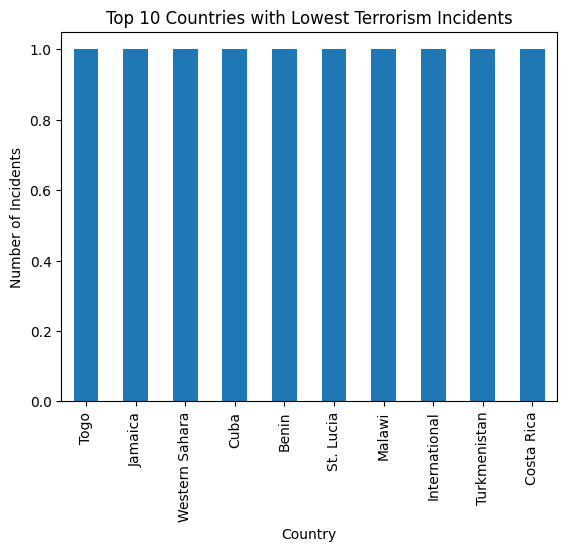

In [34]:
country_list.tail(10).plot(kind='bar')
plt.title('Top 10 Countries with Lowest Terrorism Incidents')
plt.xlabel('Country')
plt.ylabel('Number of Incidents')
plt.show()

# Region Analysis

In [35]:
region_list = df['Region'].value_counts()
print("REGION LIST")
print(region_list)

REGION LIST
South Asia                     16710
Middle East & North Africa     15288
Southeast Asia                  5126
Sub-Saharan Africa              4277
Western Europe                  2395
Eastern Europe                  2212
South America                   1787
North America                   1567
Central Asia                     237
East Asia                        160
Central America & Caribbean       73
Australasia & Oceania             51
Name: Region, dtype: int64


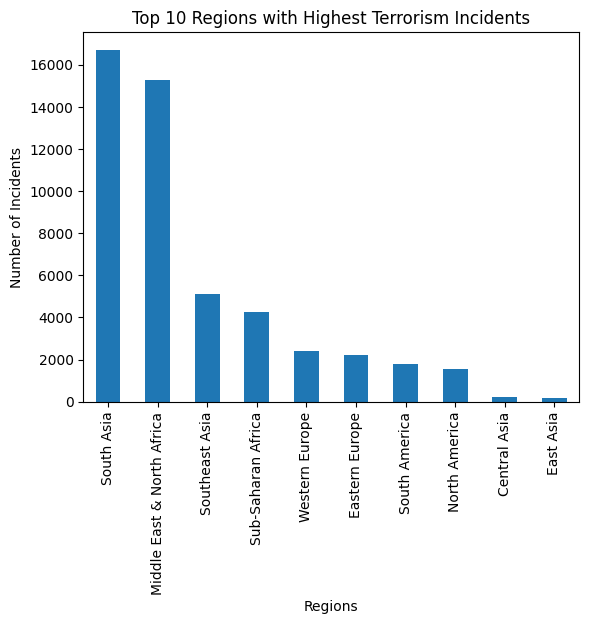

In [36]:
region_list.head(10).plot(kind='bar')
plt.title('Top 10 Regions with Highest Terrorism Incidents')
plt.xlabel('Regions')
plt.ylabel('Number of Incidents')
plt.show()

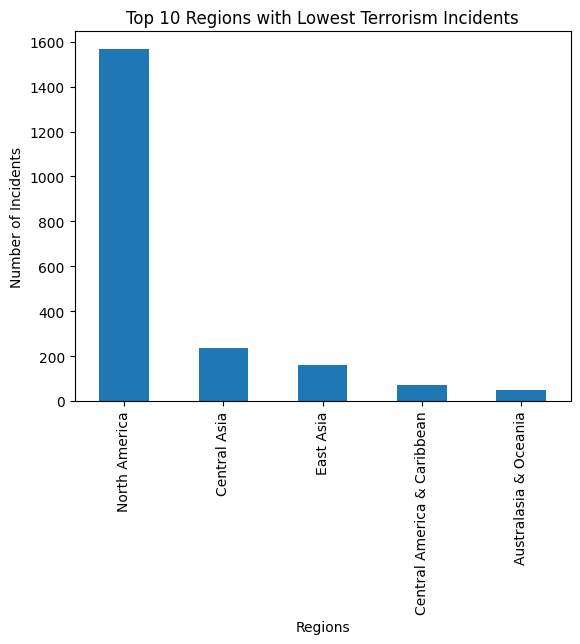

In [37]:
region_list.tail(5).plot(kind='bar')
plt.title('Top 10 Regions with Lowest Terrorism Incidents')
plt.xlabel('Regions')
plt.ylabel('Number of Incidents')
plt.show()

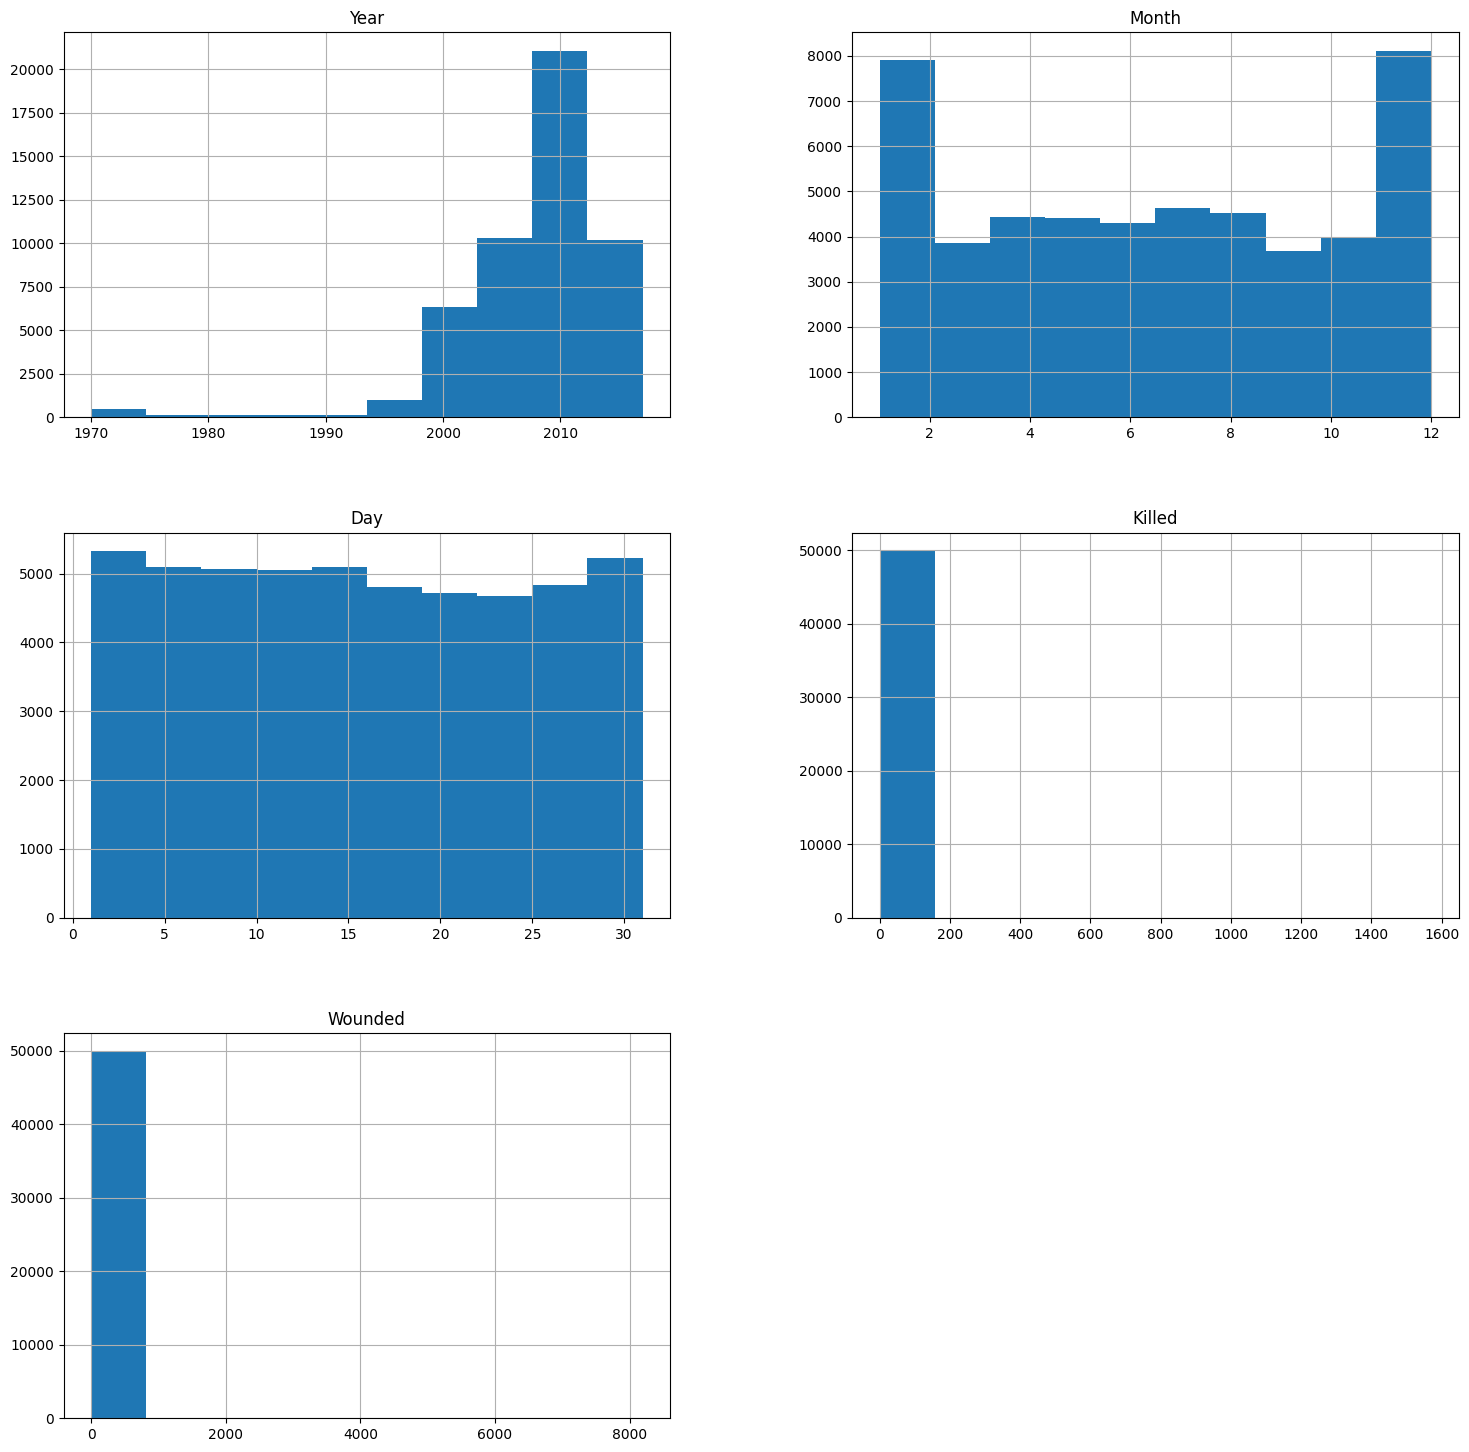

In [38]:
df.hist(figsize=(18,18))
plt.show()

# Year wise


In [39]:
terr_act = df['Year'].value_counts()
terr_act.head()

2011    5007
2010    4787
2009    4708
2008    4695
2007    3207
Name: Year, dtype: int64

In [40]:
terr_act.tail()

1981    22
1997    22
1977    18
1996    14
1979    13
Name: Year, dtype: int64

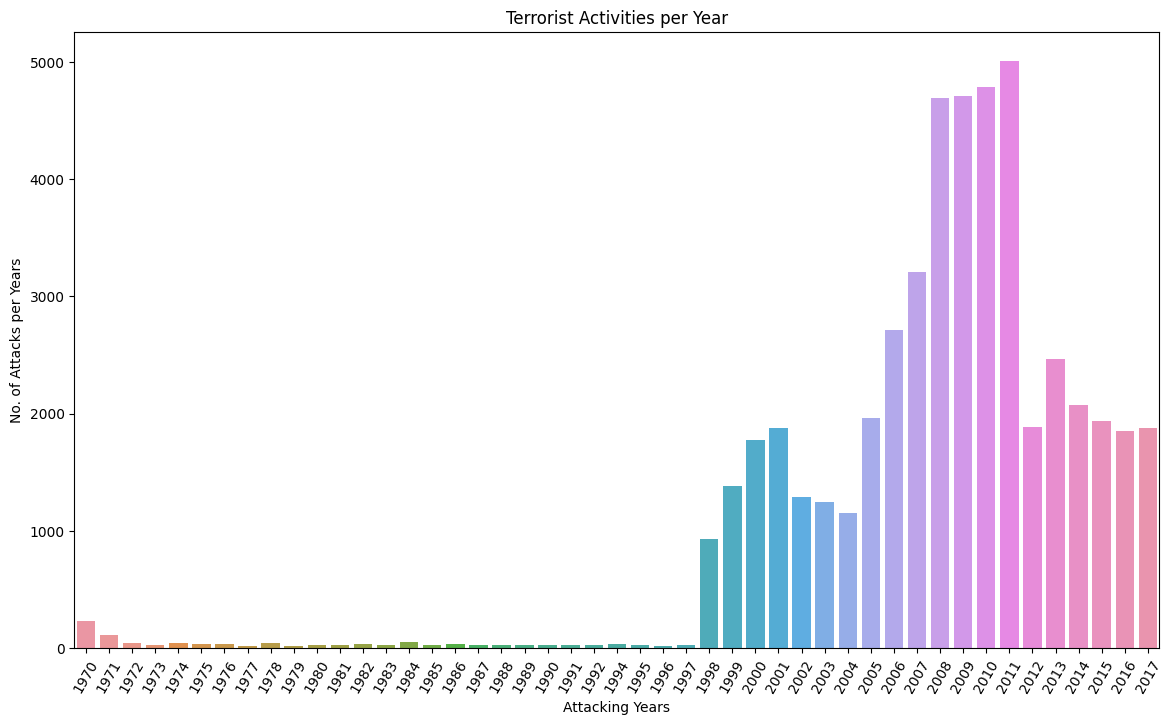

In [41]:
plt.figure(figsize=(14,8))
sns.countplot(x = df['Year'])
plt.title('Terrorist Activities per Year')
plt.xlabel('Attacking Years')
plt.ylabel('No. of Attacks per Years')
plt.xticks(rotation=60)
plt.show()

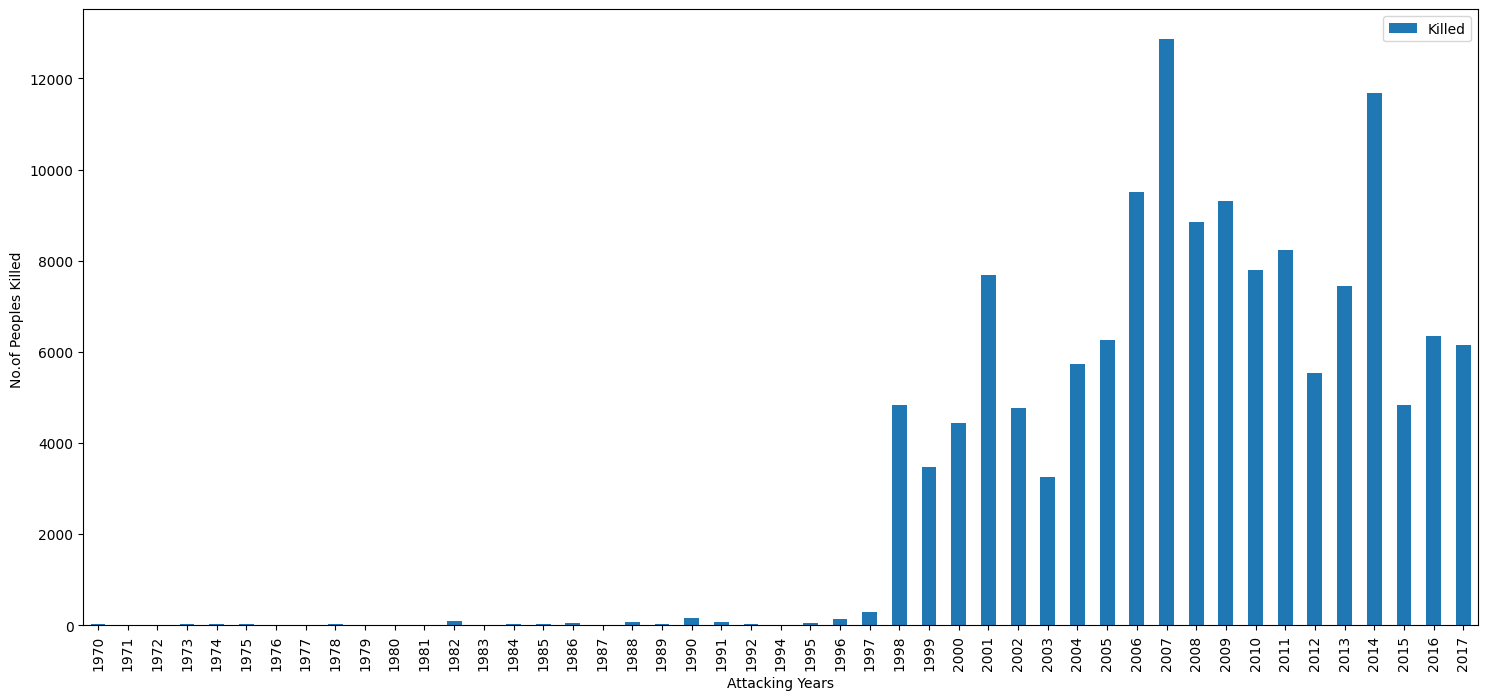

In [42]:
Year_wise_killing = df[['Killed','Year']].groupby('Year').sum()
Year_wise_killing.plot(kind='bar', figsize=(18,8))
title = 'No. of People Killed Per Year'
plt.xlabel('Attacking Years')
plt.ylabel('No.of Peoples Killed ')
plt.xticks(rotation=90)
plt.show()

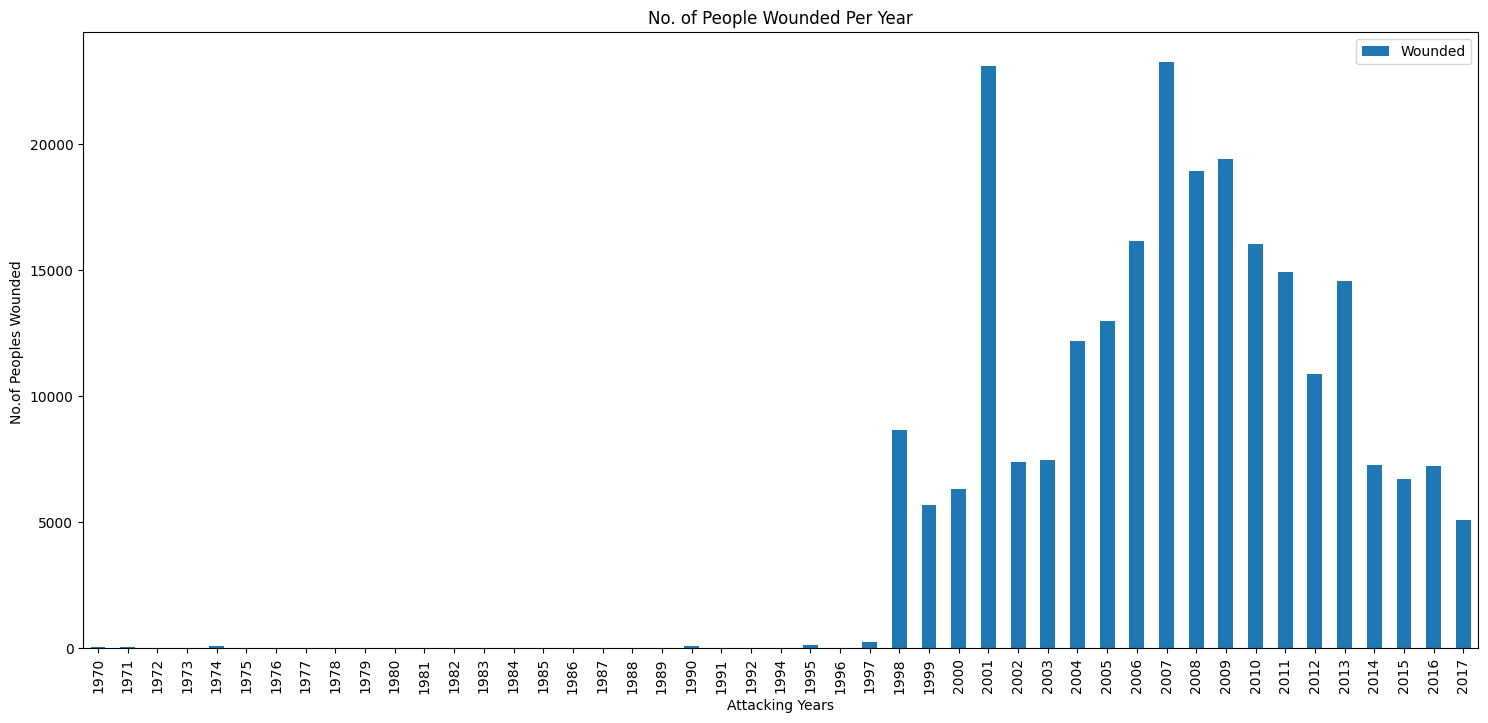

In [43]:
Year_wise_killing = df[['Wounded','Year']].groupby('Year').sum()
Year_wise_killing.plot(kind='bar', figsize=(18,8),title = 'No. of People Wounded Per Year')
plt.xlabel('Attacking Years')
plt.ylabel('No.of Peoples Wounded ')
plt.xticks(rotation=90)
plt.show()

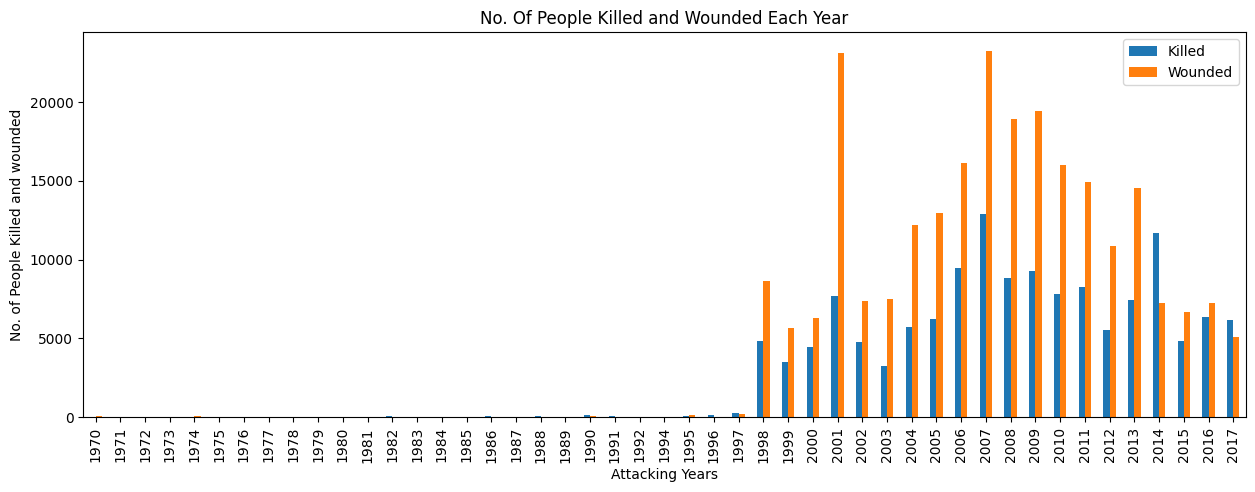

In [44]:
kill_wounded_per_year = df[['Killed','Wounded','Year']].groupby('Year').sum()
kill_wounded_per_year.plot(kind='bar', figsize=(15,5), title = 'No. Of People Killed and Wounded Each Year')
plt.xlabel('Attacking Years')
plt.ylabel('No. of People Killed and wounded')
plt.show()

# Month Wise


In [45]:
months = df['Month'].value_counts()
months.head()

7     4630
11    4625
8     4519
4     4430
5     4420
Name: Month, dtype: int64

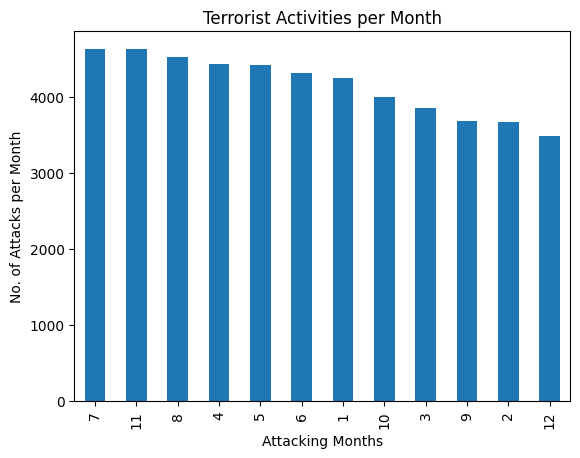

In [46]:
months.plot(kind= 'bar', title = 'Terrorist Activities per Month',xlabel='Attacking Months')
plt.ylabel('No. of Attacks per Month')
plt.show()

In [47]:
killed_per_month = df[['Month','Killed']].groupby('Month').sum()

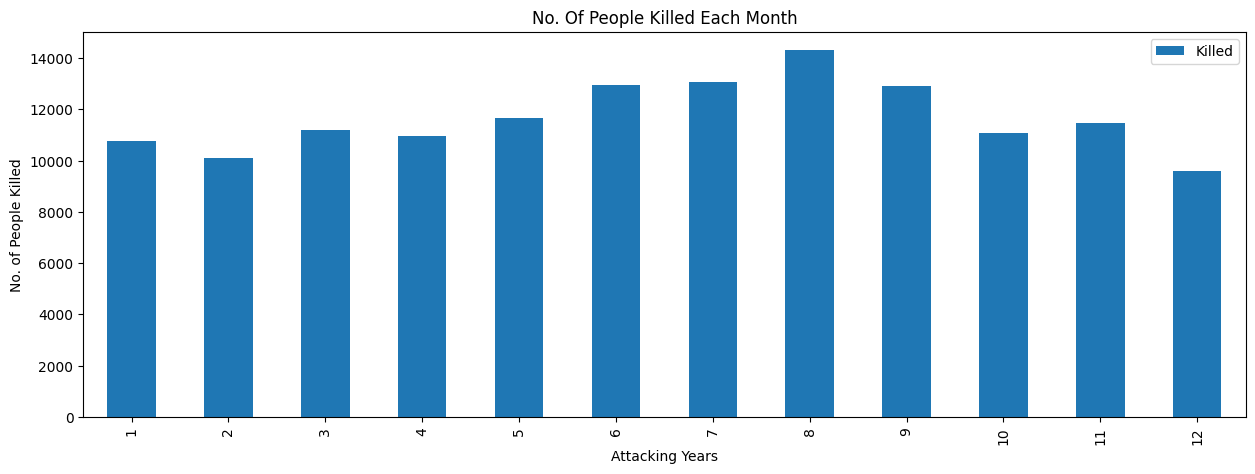

In [48]:
killed_per_month.plot(kind='bar', figsize=(15,5), title = 'No. Of People Killed Each Month')
plt.xlabel('Attacking Years')
plt.ylabel('No. of People Killed')
plt.show()

In [49]:
Wounded_per_month = df[['Wounded','Month']].groupby('Month').sum()

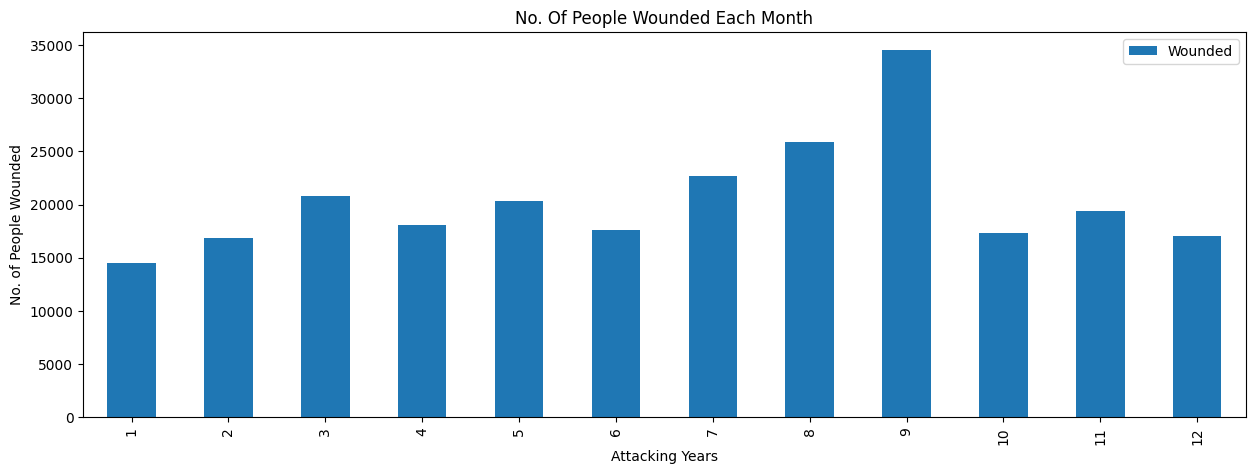

In [50]:
Wounded_per_month.plot(kind='bar', figsize=(15,5), title = 'No. Of People Wounded Each Month')
plt.xlabel('Attacking Years')
plt.ylabel('No. of People Wounded')
plt.show()

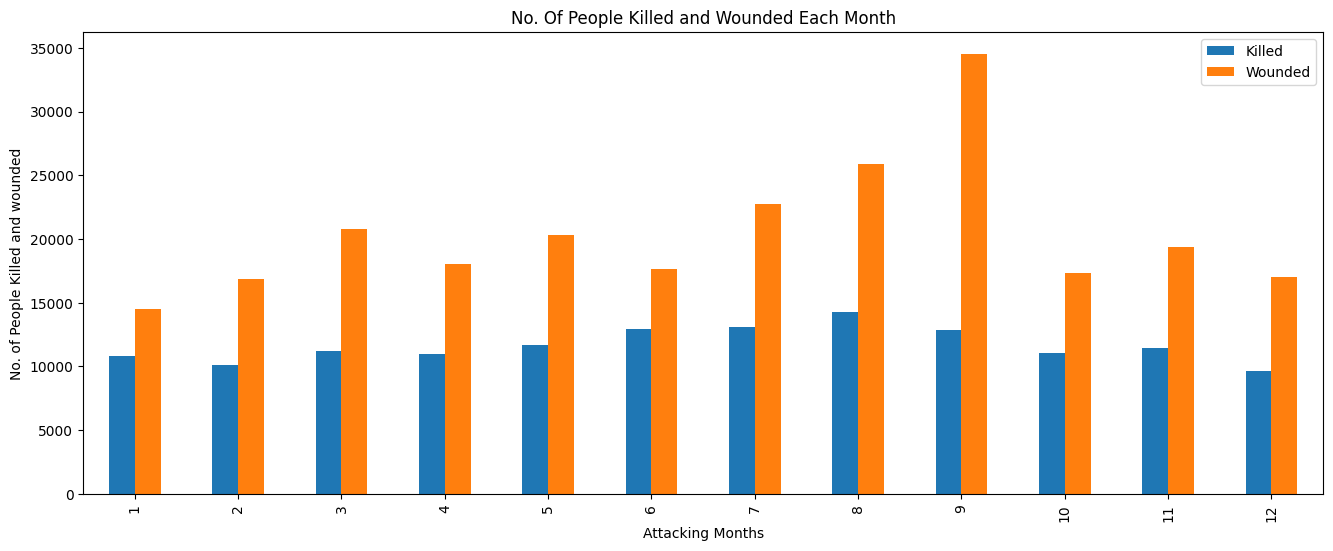

In [51]:
kill_wounded_per_month = df[['Killed','Wounded','Month']].groupby('Month').sum()
kill_wounded_per_month.plot(kind='bar',figsize = (16,6), title = 'No. Of People Killed and Wounded Each Month', xlabel='Attacking Months',
ylabel='No. of People Killed and wounded')
plt.show()

# Country Wise

In [52]:
country = df['Country'].value_counts()
country_15 = country.head(15)

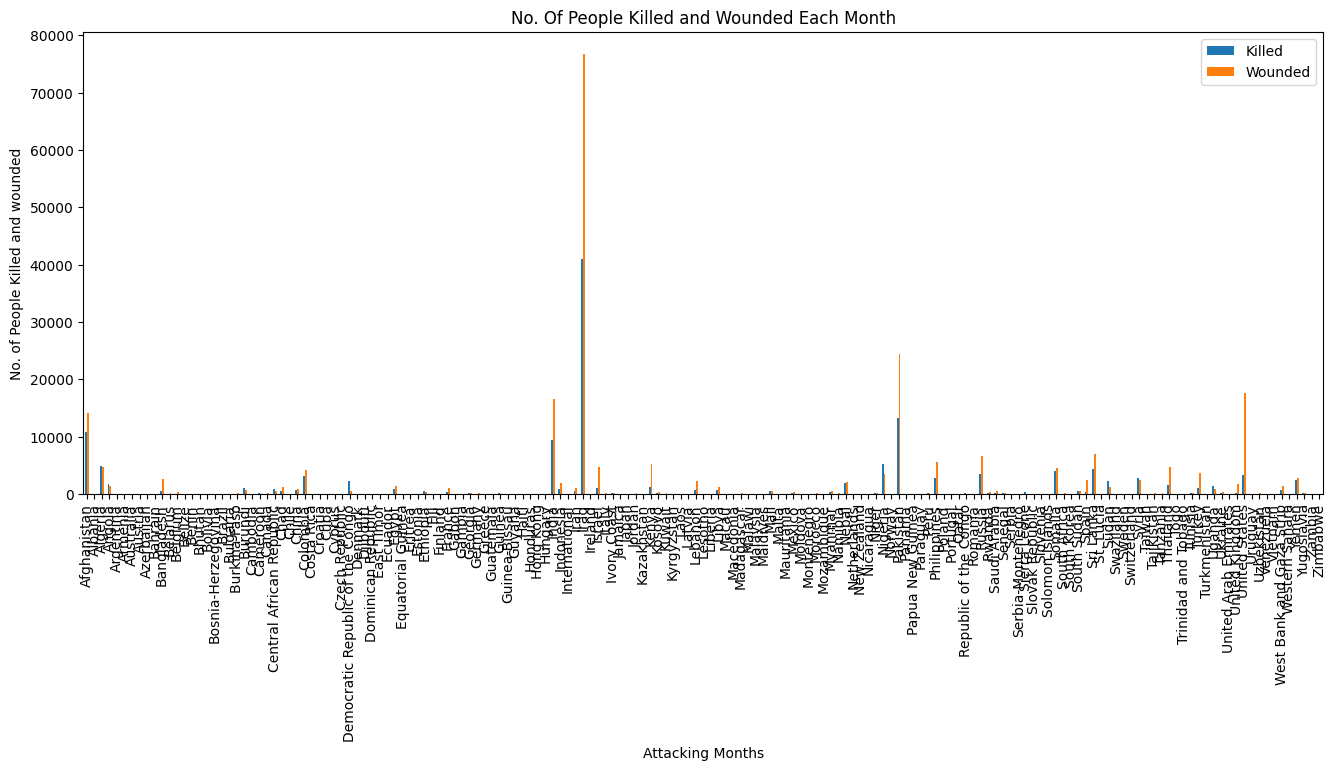

In [53]:
kill_wounded_per_month = df[['Killed','Wounded','Country']].groupby('Country').sum()
kill_wounded_per_month.plot(kind='bar',figsize = (16,6), title = 'No. Of People Killed and Wounded Each Month', xlabel='Attacking Months',
ylabel='No. of People Killed and wounded')
plt.show()

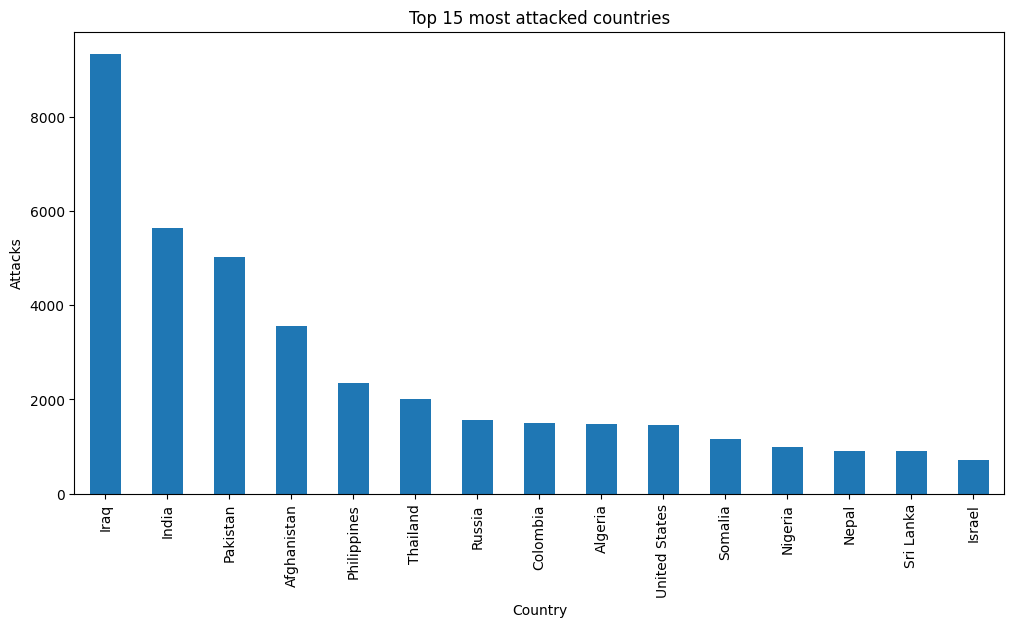

In [54]:
country_15.plot(kind='bar',figsize = (12,6), title = 'Top 15 most attacked countries', xlabel='Country',
ylabel='Attacks')
plt.show()

# State Wise

In [55]:
state = df['State'].value_counts()
state_15 = state.head(15)

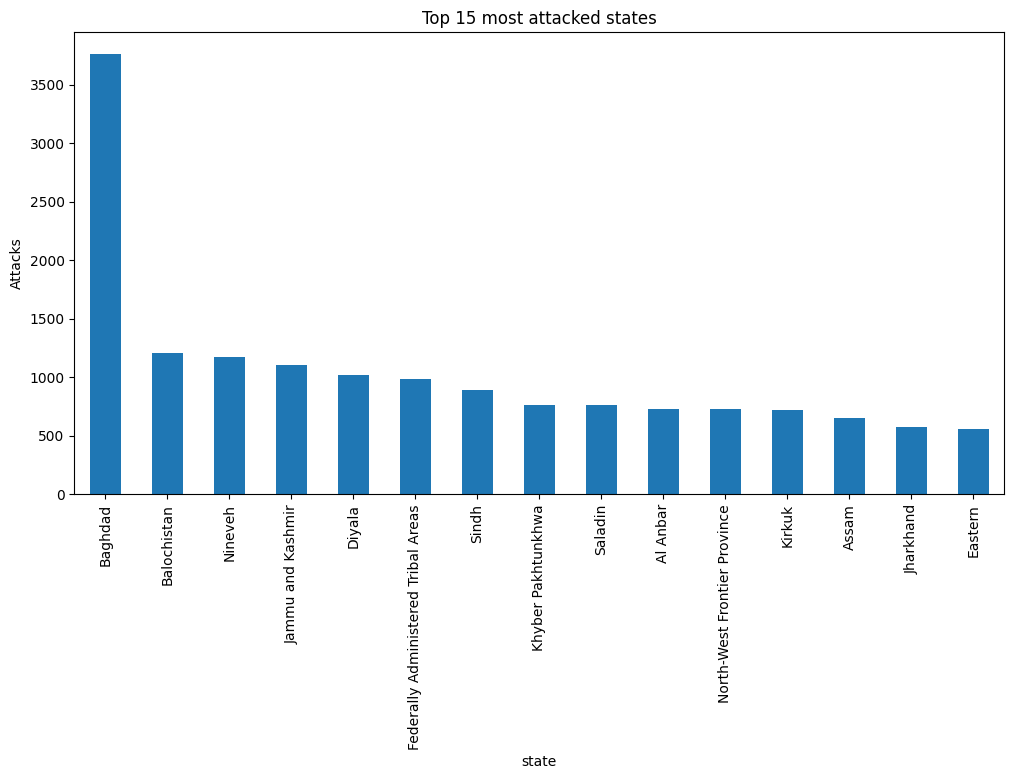

In [56]:
state_15.plot(kind='bar',figsize = (12,6), title = 'Top 15 most attacked states', xlabel='state',
ylabel='Attacks')
plt.show()

# Region Wise

In [57]:
region = df['Region'].value_counts()
region_15 = region.head(15)

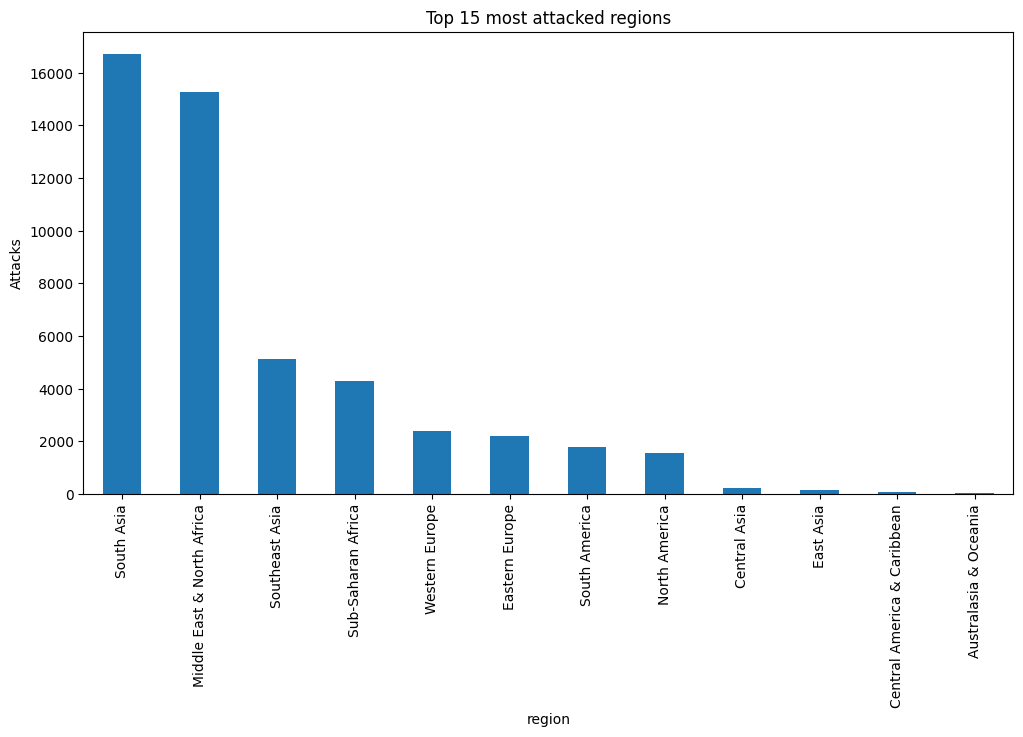

In [58]:
region_15.plot(kind='bar',figsize = (12,6), title = 'Top 15 most attacked regions', xlabel='region',
ylabel='Attacks')
plt.show()

# Attack Type

In [59]:
attack_type = df['AttackType'].value_counts()
attack_type_15 = attack_type.head(15)

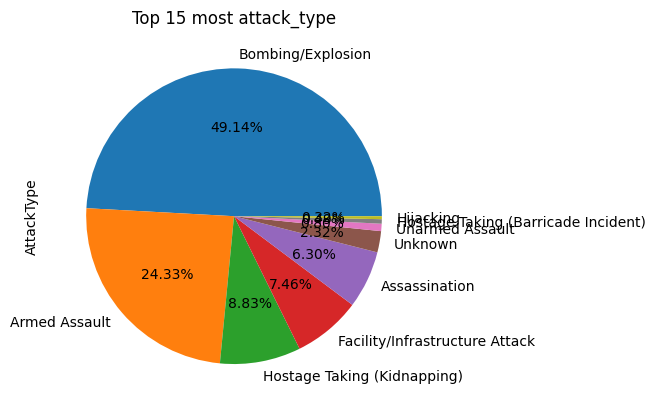

In [60]:
attack_type_15.plot(kind='pie',autopct = '%.2f%%', title = 'Top 15 most attack_type')
plt.show()

# Target Wise

In [61]:
target_type = df['Target_type'].value_counts()
target_type_15 = target_type.head(15)

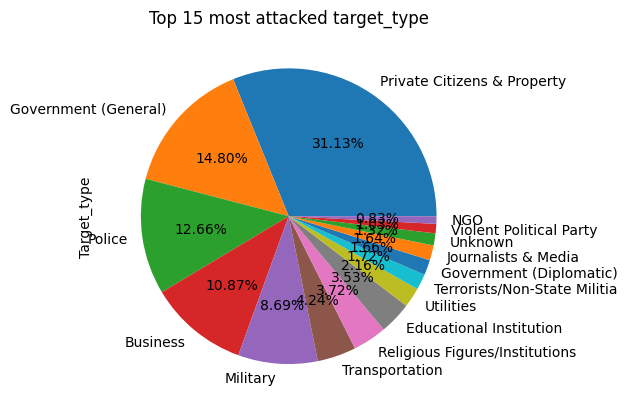

In [62]:
target_type_15.plot(kind='pie',autopct = '%.2f%%', title = 'Top 15 most attacked target_type')
plt.show()

# Weaponary used

In [63]:
weapon_used = df['Weapon_type'].value_counts().head()


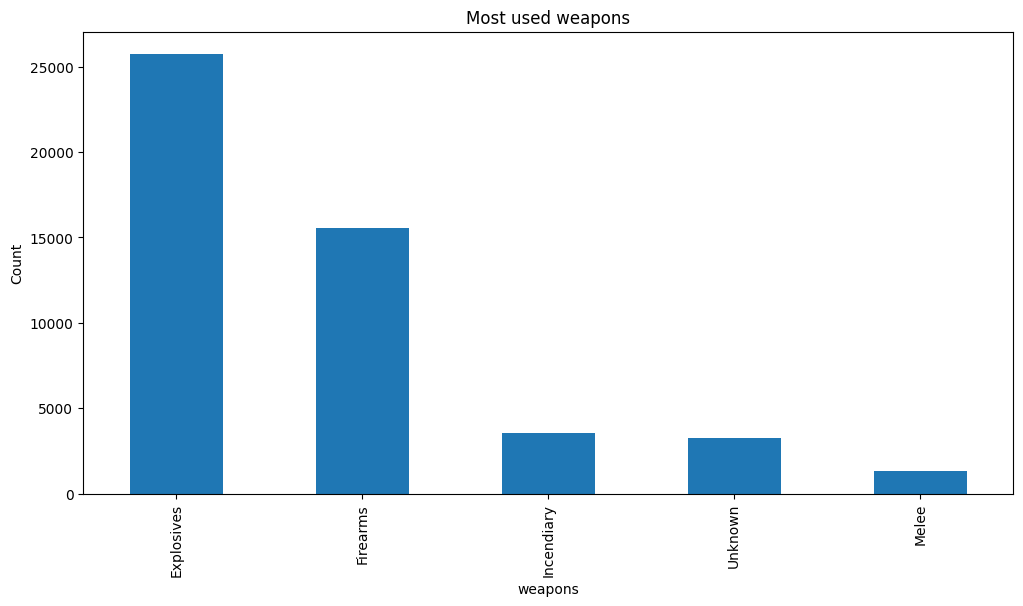

In [64]:
weapon_used.plot(kind='bar',figsize = (12,6), title = 'Most used weapons', xlabel='weapons',
ylabel='Count')
plt.show()

# Group wise

In [65]:
df['Group'] = df['Group'].replace({'Unknown': np.nan})
df = df.dropna(subset=['Group'])
terrorist_groups = df['Group'].value_counts()
terrorist_group = terrorist_groups.head(10)

<AxesSubplot:ylabel='Group'>

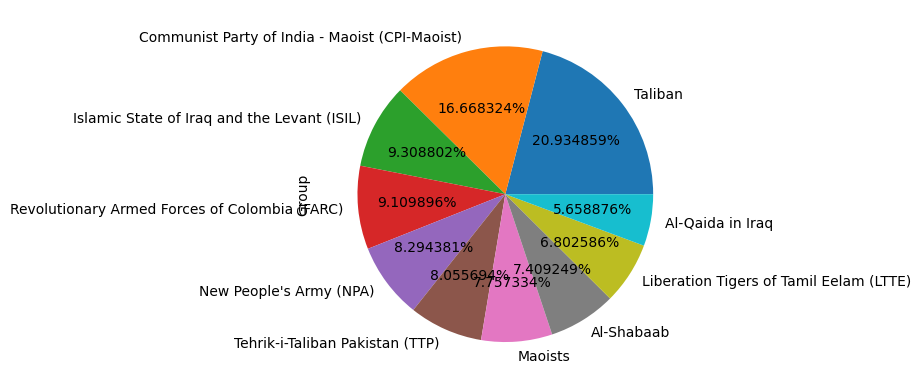

In [66]:
terrorist_group.plot(kind  = 'pie', autopct = '%2f%%')

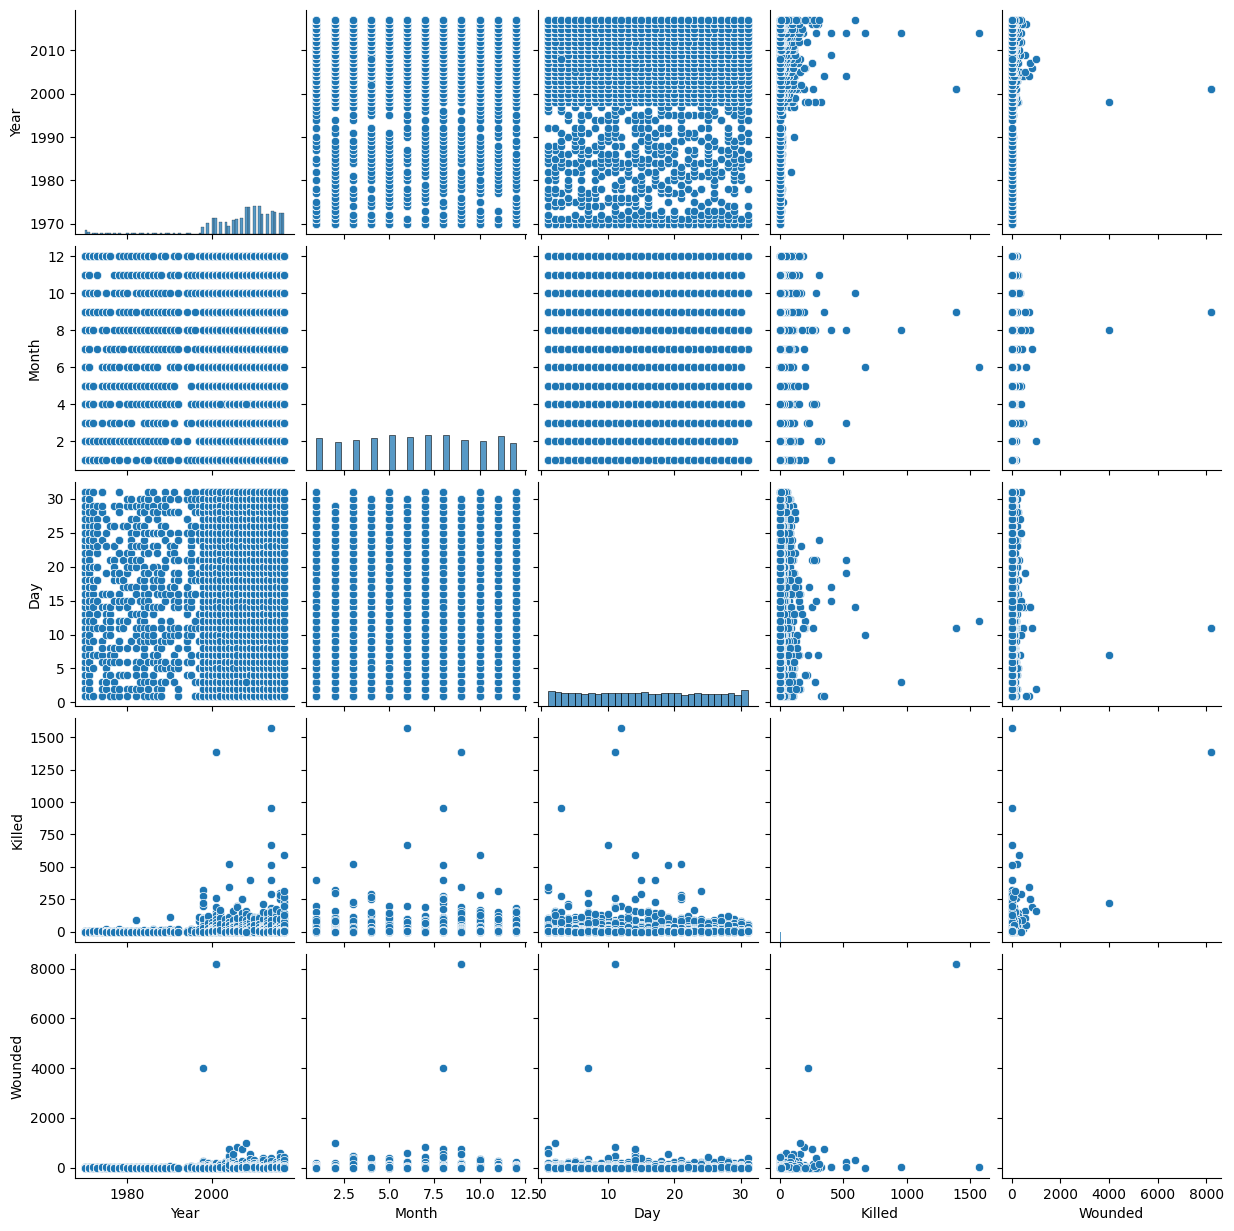

In [67]:
sns.pairplot(df)

# Valuable Insights from the given data

1. Coutry with most numbers of attacks : Iraq
2. Region with most numbers of attacks : South Asia
3. State with most numbers of attacks : Baghdad
4. Year of most terrorist activities : 2011
5. Year with most killings : 2014
6. Year with most wounded peoples : 2001 
7. Year of least terrorist activities : 1979
8. Month with most terrorist activities : July
9. Month with most killings : August
10. Month with most wounded peoples : September
11. Most used type of attack : Bombing/Explosion
12. Most targeted sector : Private sector & property
13. Weaponary used most oftenly : Explosives
14. Group involved in terrorist attacks : Taliban